In [1]:
import cv2
print(cv2.__version__)


4.11.0


In [3]:
import os
import cv2
import easyocr
import matplotlib.pyplot as plt
from IPython.display import display, Image

In [8]:
# Define paths
dataset_path = "../Dataset/SROIE2019/"  # Change this if needed
img_dir = os.path.join(dataset_path, "test/img")  # Image folder
box_dir = os.path.join(dataset_path, "test/box")  # Box annotations
entity_dir = os.path.join(dataset_path, "test/entities")  # Entity annotations

In [4]:
# Initialize OCR reader
reader = easyocr.Reader(["en"])  # English language

# Function to display image
def show_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [5]:
# Function to perform OCR
def run_ocr(image_path):
    results = reader.readtext(image_path)
    return results

In [6]:
# Function to visualize OCR results
def visualize_ocr(image_path, ocr_results):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    for (bbox, text, prob) in ocr_results:
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))
        
        # Draw bounding box
        cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
        
        # Put detected text
        cv2.putText(img, text, (top_left[0], top_left[1] - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

Original Receipt Image:


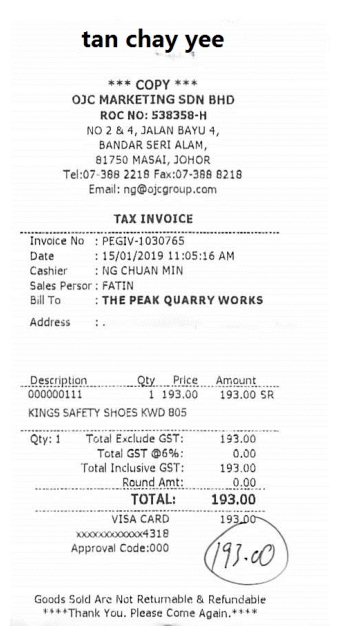

In [9]:
# Select a sample image
sample_image = os.listdir(img_dir)[0]  # Pick first image
sample_image_path = os.path.join(img_dir, sample_image)

# Display the image
print("Original Receipt Image:")
show_image(sample_image_path)

In [10]:
# Run OCR
print("OCR Results:")
ocr_results = run_ocr(sample_image_path)
for bbox, text, prob in ocr_results:
    print(f"Detected: '{text}' (Confidence: {prob:.2f})")

OCR Results:
Detected: 'tan' (Confidence: 1.00)
Detected: 'yee' (Confidence: 1.00)
Detected: '***' (Confidence: 0.25)
Detected: 'CoPY' (Confidence: 0.31)
Detected: '#00' (Confidence: 0.02)
Detected: 'OJC MARKETING SDN BHD' (Confidence: 0.98)
Detected: 'ROc No: 538358-H}' (Confidence: 0.25)
Detected: 'NO 2 & 4 JALAN BAYU 4_' (Confidence: 0.60)
Detected: 'BANDAR SERI ALAM;' (Confidence: 0.78)
Detected: '81750 MASAI, JOHOR' (Confidence: 0.49)
Detected: 'Tel:07-388 2218 Fax:07-J88 8218' (Confidence: 0.76)
Detected: 'Email: ng@ojcgroup.com' (Confidence: 0.89)
Detected: 'TAX INVOICE' (Confidence: 0.87)
Detected: 'Invoice No' (Confidence: 0.89)
Detected: 'PEGIV-]030765' (Confidence: 0.76)
Detected: 'Date' (Confidence: 0.86)
Detected: '15/01/2019 11:05:16 AM' (Confidence: 0.60)
Detected: 'Cashier' (Confidence: 0.90)
Detected: 'NG CHUAN MIN' (Confidence: 0.79)
Detected: 'Sales Persor' (Confidence: 0.99)
Detected: 'FATIN' (Confidence: 1.00)
Detected: 'Bill To' (Confidence: 0.99)
Detected: 'The P

Visualized OCR Output:


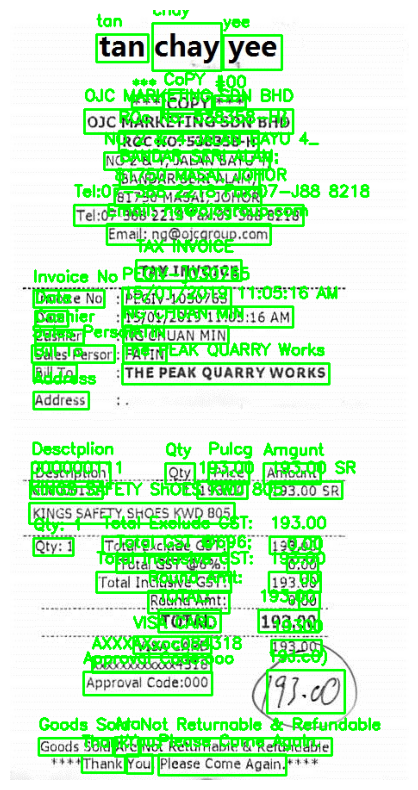

In [11]:
# Visualize OCR Output
print("Visualized OCR Output:")
visualize_ocr(sample_image_path, ocr_results)